# Micro Credit Defaulter Model

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of issuance of loan. 
In this case, Label 1 indicates that the loan has been payed, while Label 0 indicates that the loan has not been payed.

Importing the required libraries as shown below

Data Analysing

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Importing csv format dataset 

In [2]:
da=pd.read_csv('micro.csv')
da

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
#Since we don't need unnamed: 0 column in our dataset 

data=da.drop(['Unnamed: 0'],axis=1)

In [4]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
#getting the shape of the complete dataset it defines number of columns and rows

data.shape

(209593, 36)

In [6]:
#head of the dataset which shows first 5 rows of dataset

data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [7]:
#tail of the dataset which shows last 5 rows of dataset

data.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [8]:
#getting the clumns of the dataset

data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
#columns and their data types 

data.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [10]:
#finding null values  

data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [11]:
#getting information about each column which gives null value, count and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [12]:
#getting the unique values in a column

data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [13]:
#target column as label finding unique values in target column

data.label.unique()

array([0, 1], dtype=int64)

In [14]:
#count values of 1 and 0 

data.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [15]:
#used to view some basic statistical details like percentile, mean, std and so on

data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Exploratory Data Analysis

Univariate Plot

1    183431
0     26162
Name: label, dtype: int64


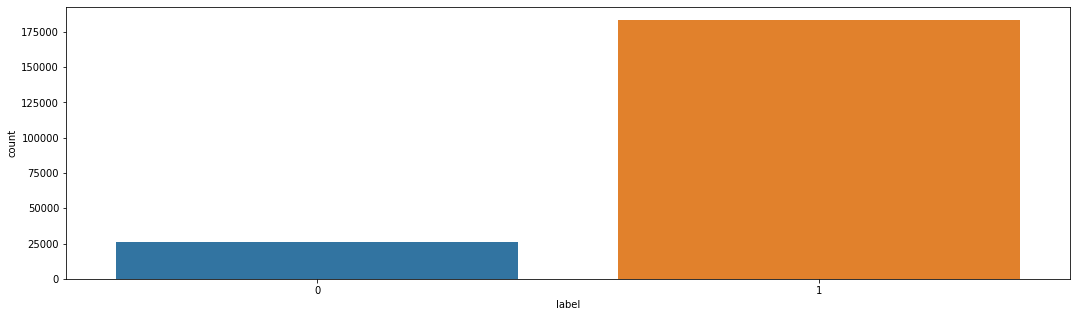

In [16]:
plt.figure(figsize=(18,5))
print(data['label'].value_counts())
sb.countplot(x='label',data=data)

In Label 1 indicates that the loan has been payed by the user and 0 indicates that the loan has been payed by the user 
Approximately 85+ % users have paid there loan within 5 days

1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
19913        1
10454        1
14783        1
4066         1
22609        1
Name: last_rech_amt_ma, Length: 70, dtype: int64


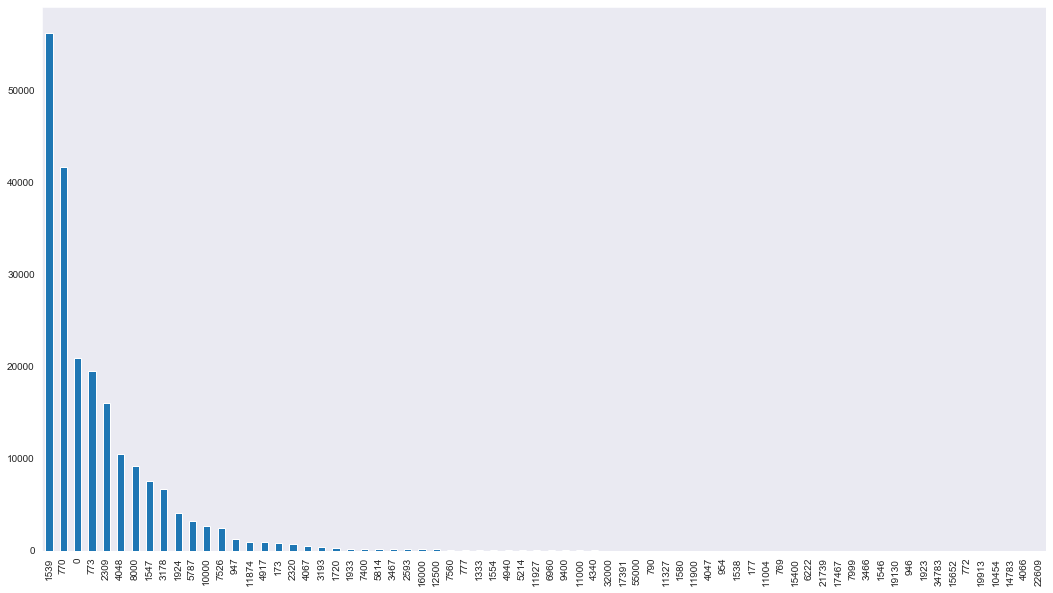

In [17]:
plt.figure(figsize=(18,10))
print(data['last_rech_amt_ma'].value_counts())
sb.set_style('dark')
data['last_rech_amt_ma'].value_counts().plot.bar()

The above graph shows the Number of days till last recharge of main account 
i,e 
number of days since the last recharge made.

1      37238
2      31216
0      27979
3      25519
4      20258
       ...  
64         1
63         1
59         1
50         1
115        1
Name: cnt_ma_rech30, Length: 71, dtype: int64


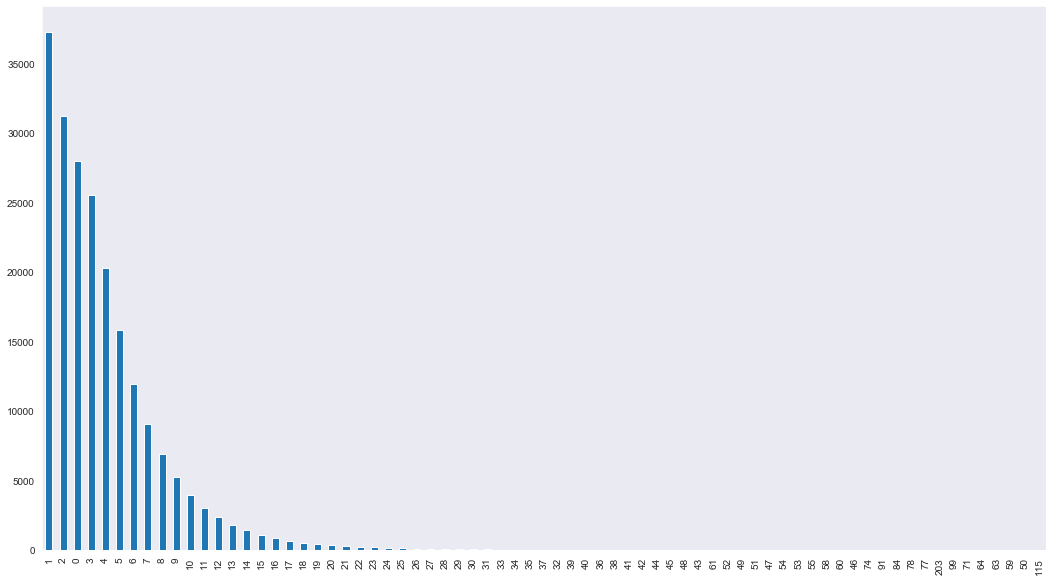

In [18]:
plt.figure(figsize=(18,10))
print(data['cnt_ma_rech30'].value_counts())
sb.set_style('dark')
data['cnt_ma_rech30'].value_counts().plot.bar()

Number of times main account got recharged in last 30 days

With the help of graph we can say that 1 time main acount gets recharged in last 30 days which is 37k+ user recharge once in 30 days 

2 times recharge is done by 31K+ users and so on

1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
151        1
336        1
121        1
172        1
127        1
Name: cnt_ma_rech90, Length: 110, dtype: int64


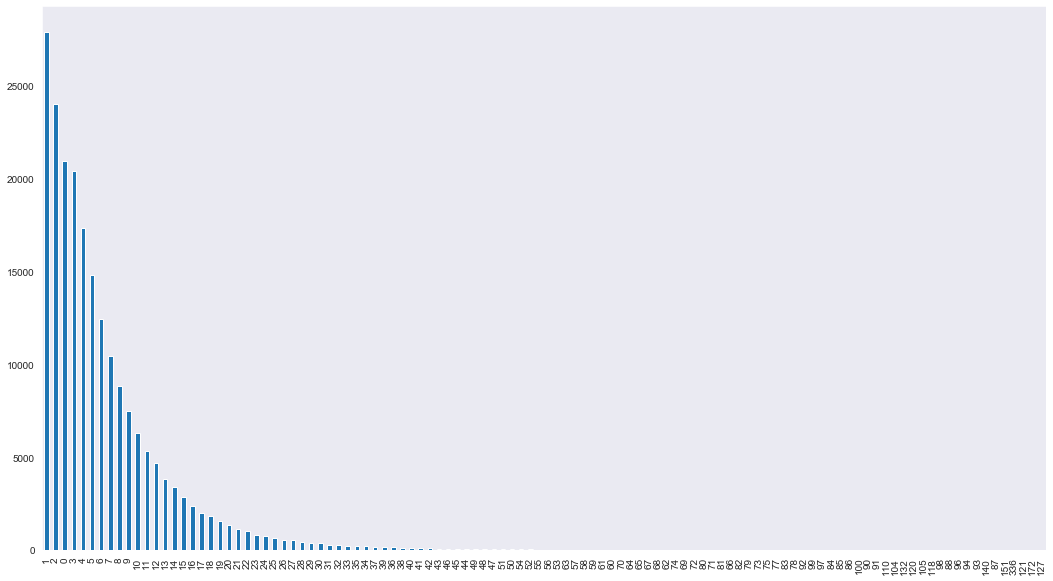

In [19]:
plt.figure(figsize=(18,10))
print(data['cnt_ma_rech90'].value_counts())
sb.set_style('dark')
data['cnt_ma_rech90'].value_counts().plot.bar()

Number of times main account got recharged in last 90 days

With the help of graph we can say that 1 time main acount gets recharged in last 90 days which is 27k+ user recharge once in 90 days

2 times recharge is done by 24K+ users and so on

0     65753
1     24373
2     19285
3     13192
4     10021
      ...  
80        7
81        7
88        5
84        4
87        1
Name: fr_ma_rech90, Length: 89, dtype: int64


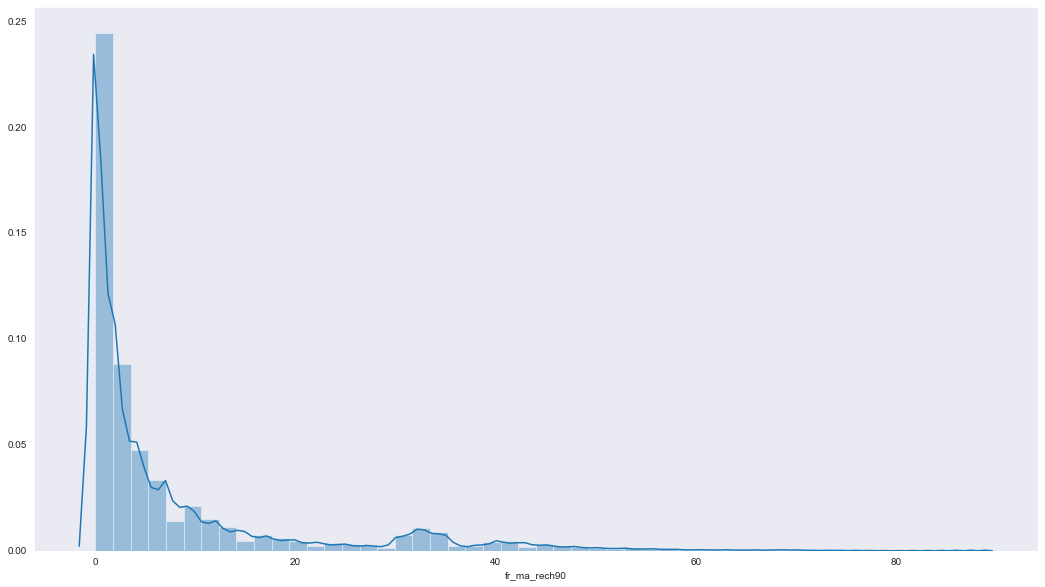

In [20]:
plt.figure(figsize=(18,10))
print(data['fr_ma_rech90'].value_counts())
sb.set_style('dark')
sb.distplot(data['fr_ma_rech90'])

Frequency of main account recharged in last 90 days visual presenation as shown above

24k+ user recharge once in 90 days 

19K+user rechage twice in last 90 days and so on



1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64


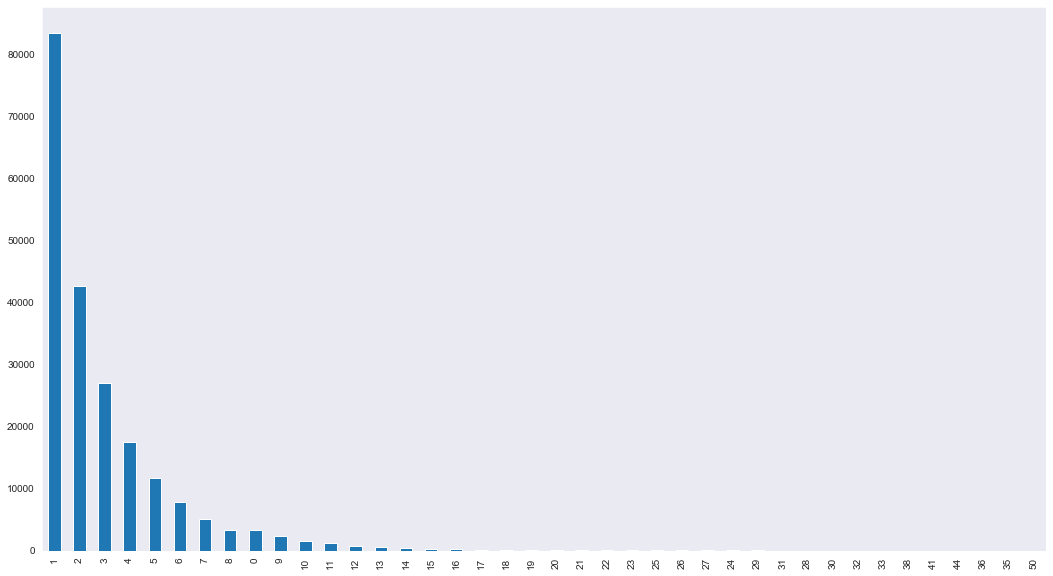

In [21]:
plt.figure(figsize=(18,10))
print(data['cnt_loans30'].value_counts())
sb.set_style('dark')
data['cnt_loans30'].value_counts().plot.bar()

Number of loans taken by user in last 30 days

83K+ user took loan once in 30 days 

42K+ user took loan twice in last 30 days and so on

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
144       30
150       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
252        4
228        4
216        4
276        3
222        3
264        3
258        3
204        2
240        2
300        1
270        1
306        1
246        1
Name: amnt_loans30, dtype: int64


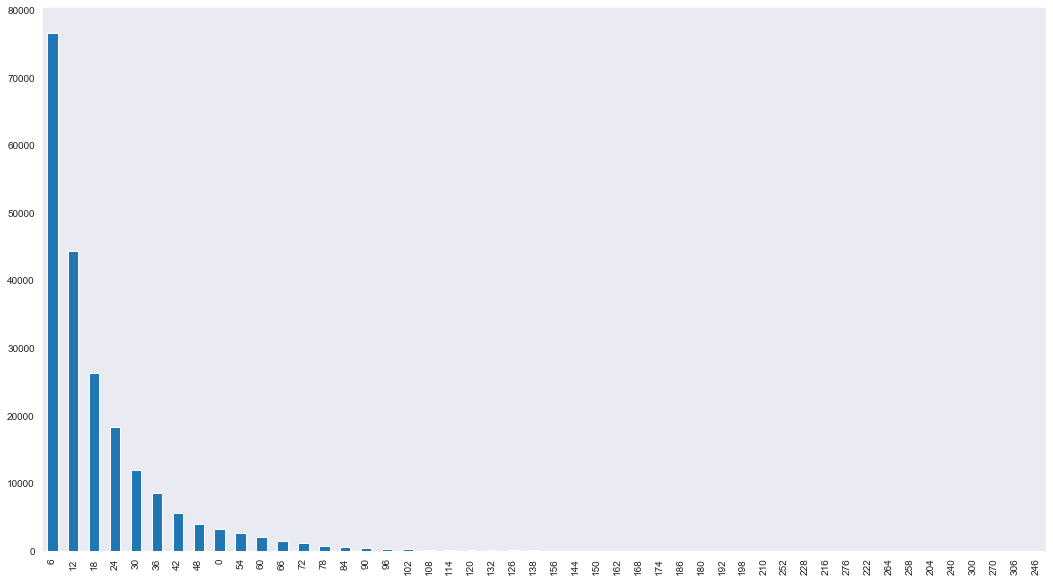

In [22]:
plt.figure(figsize=(18,10))
print(data['amnt_loans30'].value_counts())
sb.set_style('dark')
data['amnt_loans30'].value_counts().plot.bar()

Total amount of loans taken by user in last 30 days

Rs.6 loan holds highest position with 76K+ users 

Rs.12 loan hold 2nd position with 44K+ users

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3043.099370        1
2667.929173        1
2508.179038        1
2604.261985        1
4876.239599        1
Name: cnt_loans90, Length: 1110, dtype: int64


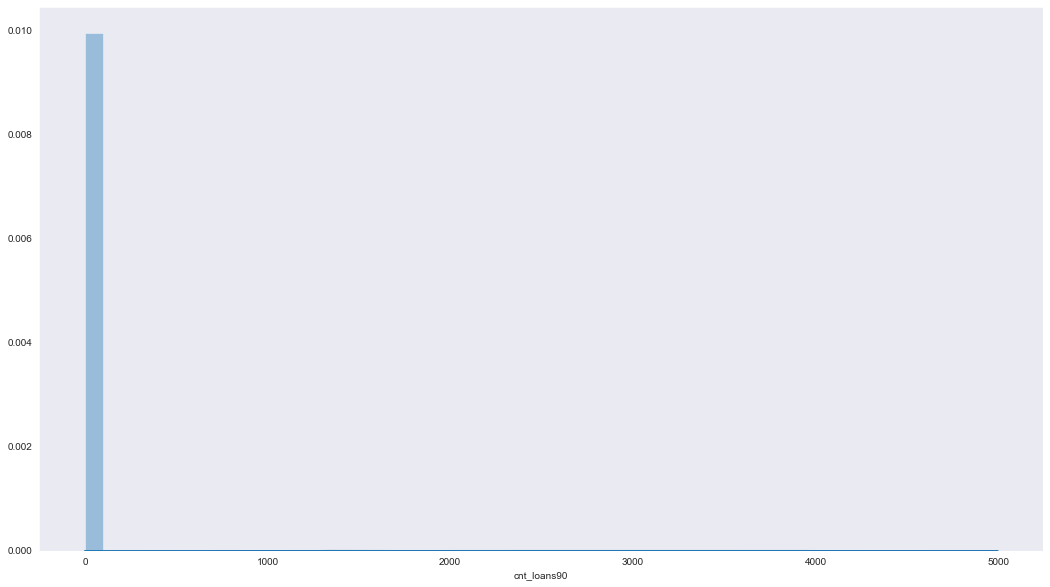

In [23]:
plt.figure(figsize=(18,10))
print(data['cnt_loans90'].value_counts())
sb.set_style('dark')
sb.distplot(data['cnt_loans90'])

Number of loans taken by user in last 90 days

73K+ user took loan once in 90 days

37K+ user took loan twice in last 90 days and so on

6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
426        1
396        1
438        1
342        1
Name: amnt_loans90, Length: 69, dtype: int64


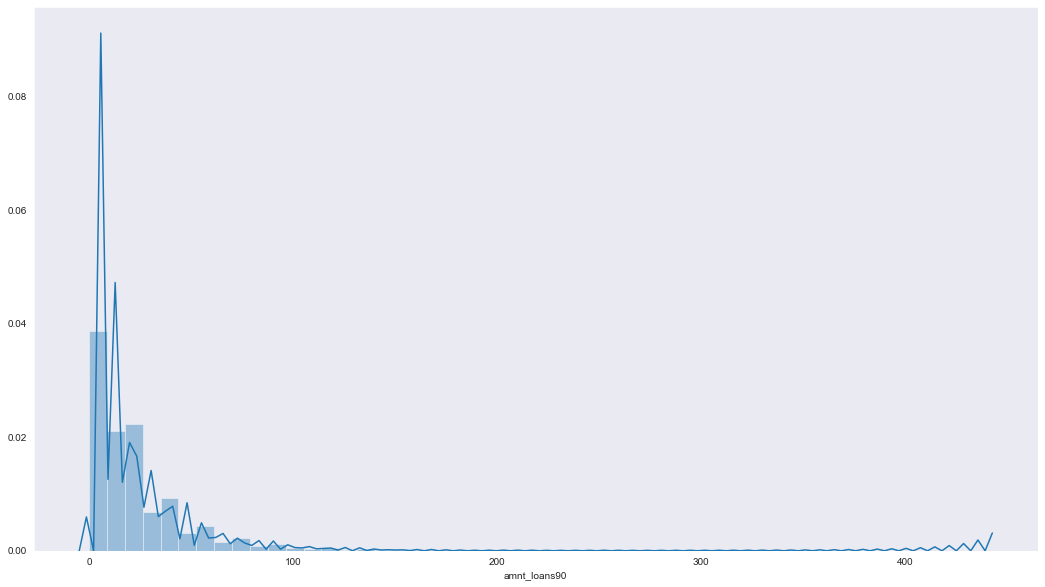

In [24]:
plt.figure(figsize=(18,10))
print(data['amnt_loans90'].value_counts())
sb.set_style('dark')
sb.distplot(data['amnt_loans90'])

Total amount of loans taken by user in last 90 days

Rs.6 loan holds highest position with 69K+ users

Rs.12 loan hold 2nd position with 38K+ users

Rs.18 loan holds 3rd position with 23K+ users

Bivariate plot

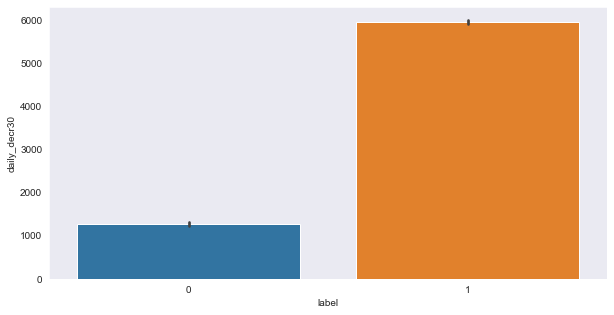

In [25]:
plt.figure(figsize=(10,5))
sb.barplot(x='label',y='daily_decr30',data=data)

Daily amount spent from main account, averaged over last 30 days compared with target who paid loan within 5 days 

1 defines loan paid with 6K+ users ad 0 defines loan not paid with 1K+ users

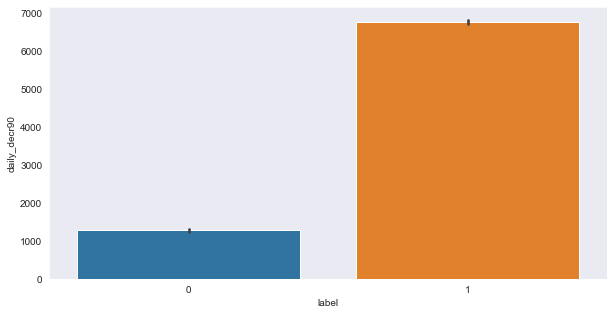

In [26]:
plt.figure(figsize=(10,5))
sb.barplot(x='label',y='daily_decr90',data=data)

Daily amount spent from main account, averaged over last 90 days compared with target who paid loan within 5 days

1 defines loan paid with 6K+ users ad 0 defines loan not paid with 1K+ users

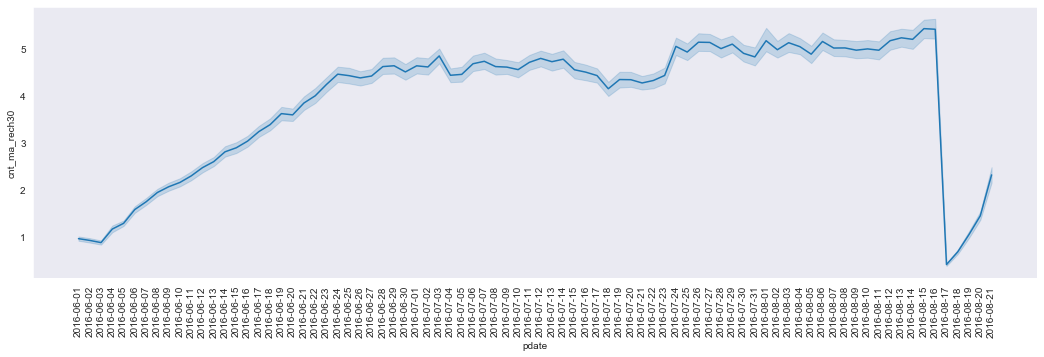

In [27]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sb.lineplot(x='pdate',y='cnt_ma_rech30',data=data)

Number of times main account got recharged in last 30 days with respect to date, most of the users have recharged in the range of 3 to 5 times.

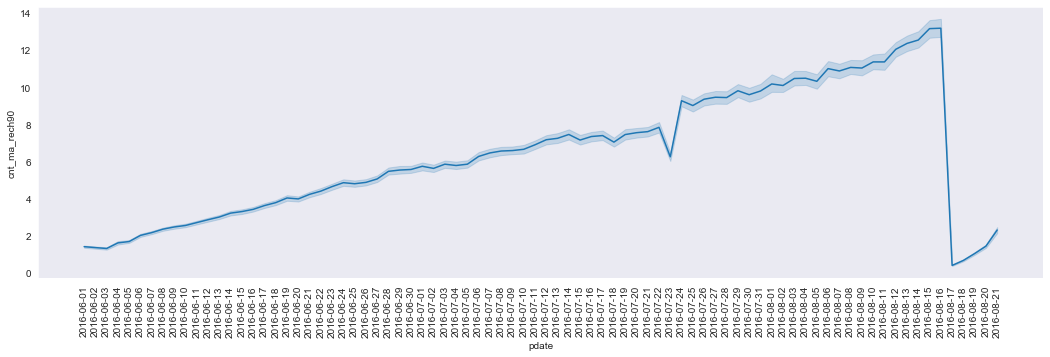

In [28]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sb.lineplot(x='pdate',y='cnt_ma_rech90',data=data)

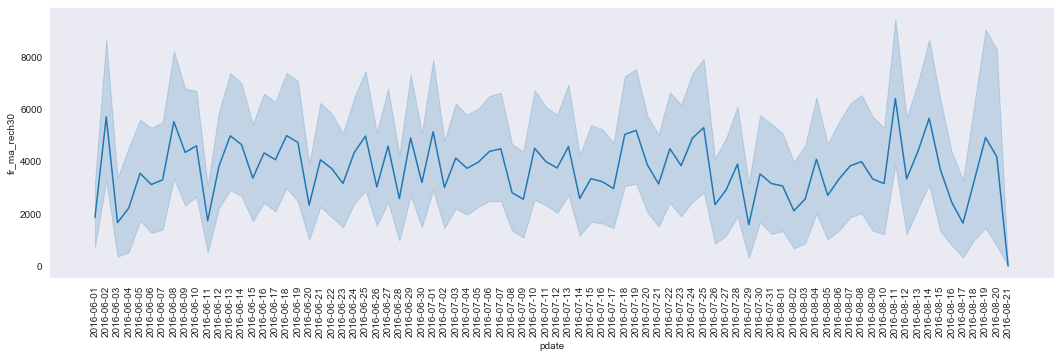

In [29]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sb.lineplot(x='pdate',y='fr_ma_rech30',data=data)

Frequency of main account recharged in last 30 days with respect to date line graph represents frequency of recharge done by date. But it ranges from 2000 to 6500.

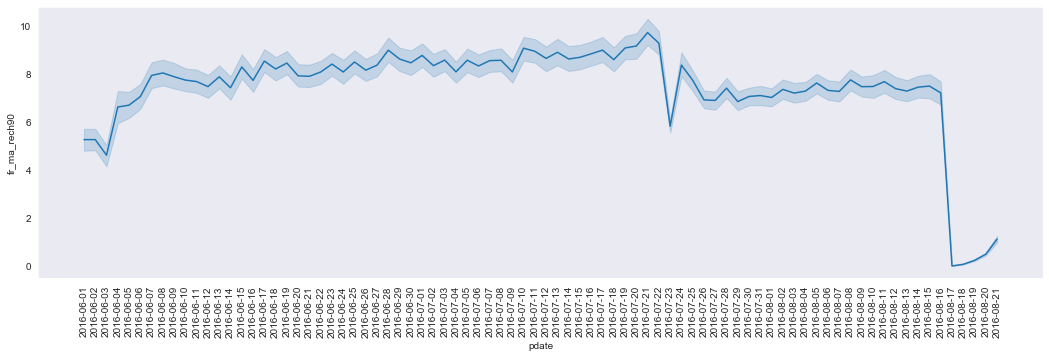

In [30]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sb.lineplot(x='pdate',y='fr_ma_rech90',data=data)

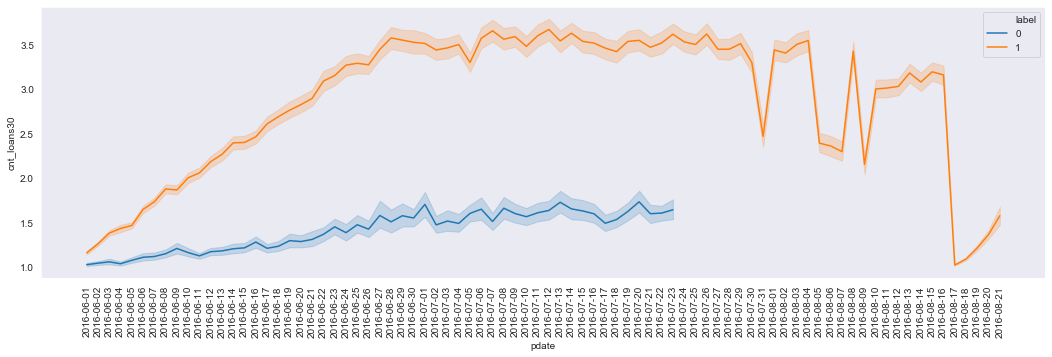

In [31]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sb.lineplot(x='pdate',y='cnt_loans30',hue='label',data=data)

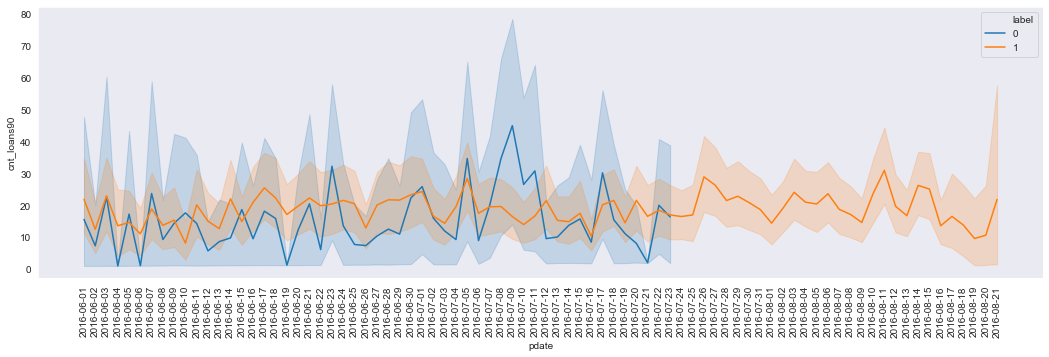

In [32]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sb.lineplot(x='pdate',y='cnt_loans90',hue='label',data=data)

Number of loans taken by user in last 90 days with repesct to date and here orange defines loan paid and 

blue defines loan not paid

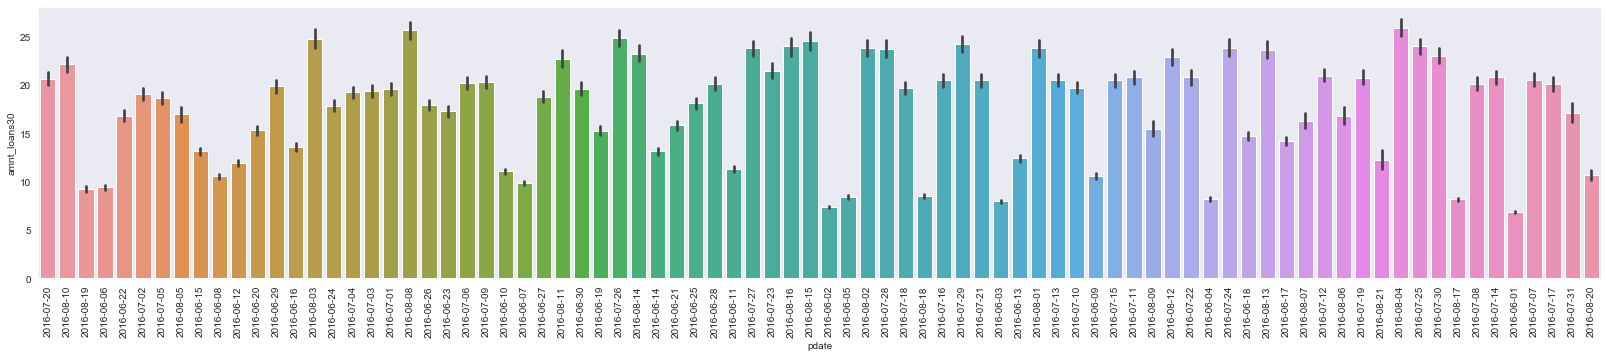

In [33]:
plt.figure(figsize=(28,5))
plt.xticks(rotation=90)
sb.barplot(x='pdate',y='amnt_loans30',data=data)

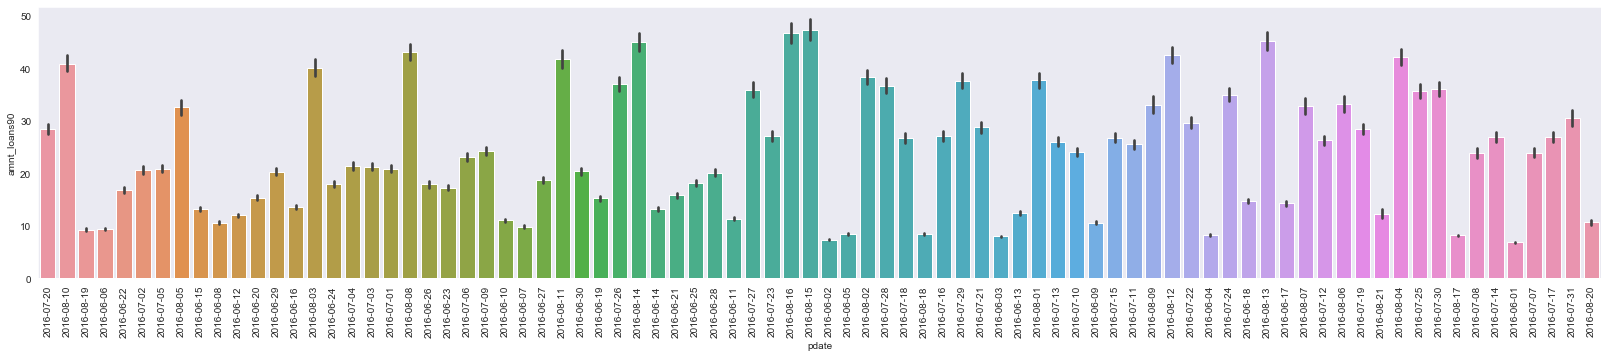

In [34]:
plt.figure(figsize=(28,5))
plt.xticks(rotation=90)
sb.barplot(x='pdate',y='amnt_loans90',data=data)

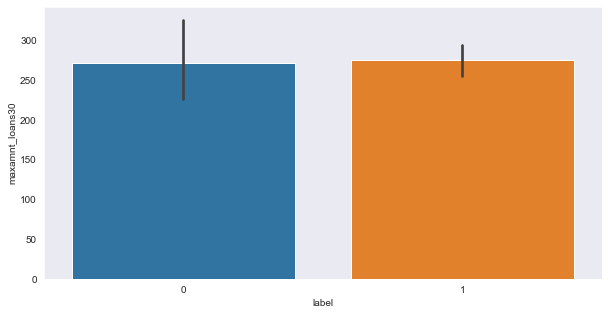

In [35]:
plt.figure(figsize=(10,5))
sb.barplot(x='label',y='maxamnt_loans30',data=data)

maximum amount of loan taken by the user in last 30 days 

here both loan paid and loan not paid is almost equal

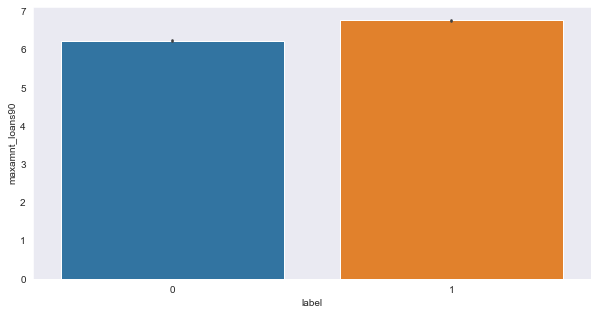

In [36]:
plt.figure(figsize=(10,5))
sb.barplot(x='label',y='maxamnt_loans90',data=data)

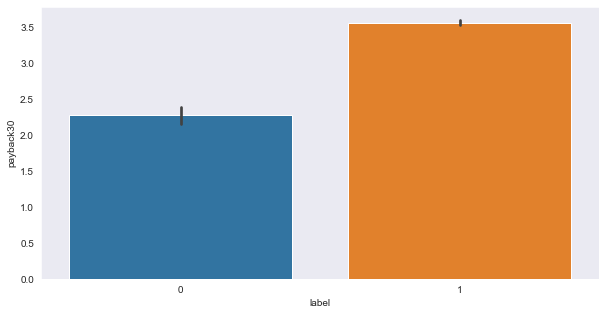

In [38]:
plt.figure(figsize=(10,5))
sb.barplot(x='label',y='payback30',data=data)

Average payback time in days over last 30 days is compared with label 

In past 30 days total average payback defines 1 and loan not paid defined by 0

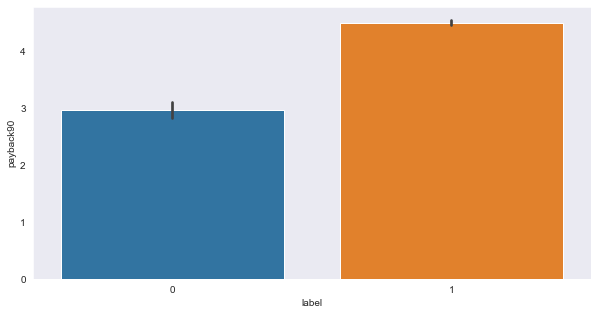

In [39]:
plt.figure(figsize=(10,5))
sb.barplot(x='label',y='payback90',data=data)

# Data Preprocessing

In [40]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [41]:
# here pdate is split into year month and day as shown below

data['year']=data['pdate'].str.split('-').str[0]
data['month']=data['pdate'].str.split('-').str[1]
data['day']=data['pdate'].str.split('-').str[2]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [43]:
#converting object data type into int 

data['day']=data['day'].astype(int)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)

In [44]:
data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [45]:
#removing columns wich doesn't help while modeling

datafin=data.drop(['pdate','msisdn','year','pcircle'],axis=1)

In [46]:
datafin

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [47]:
#to find the pairwise correlation of all columns in the dataset

datafin.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


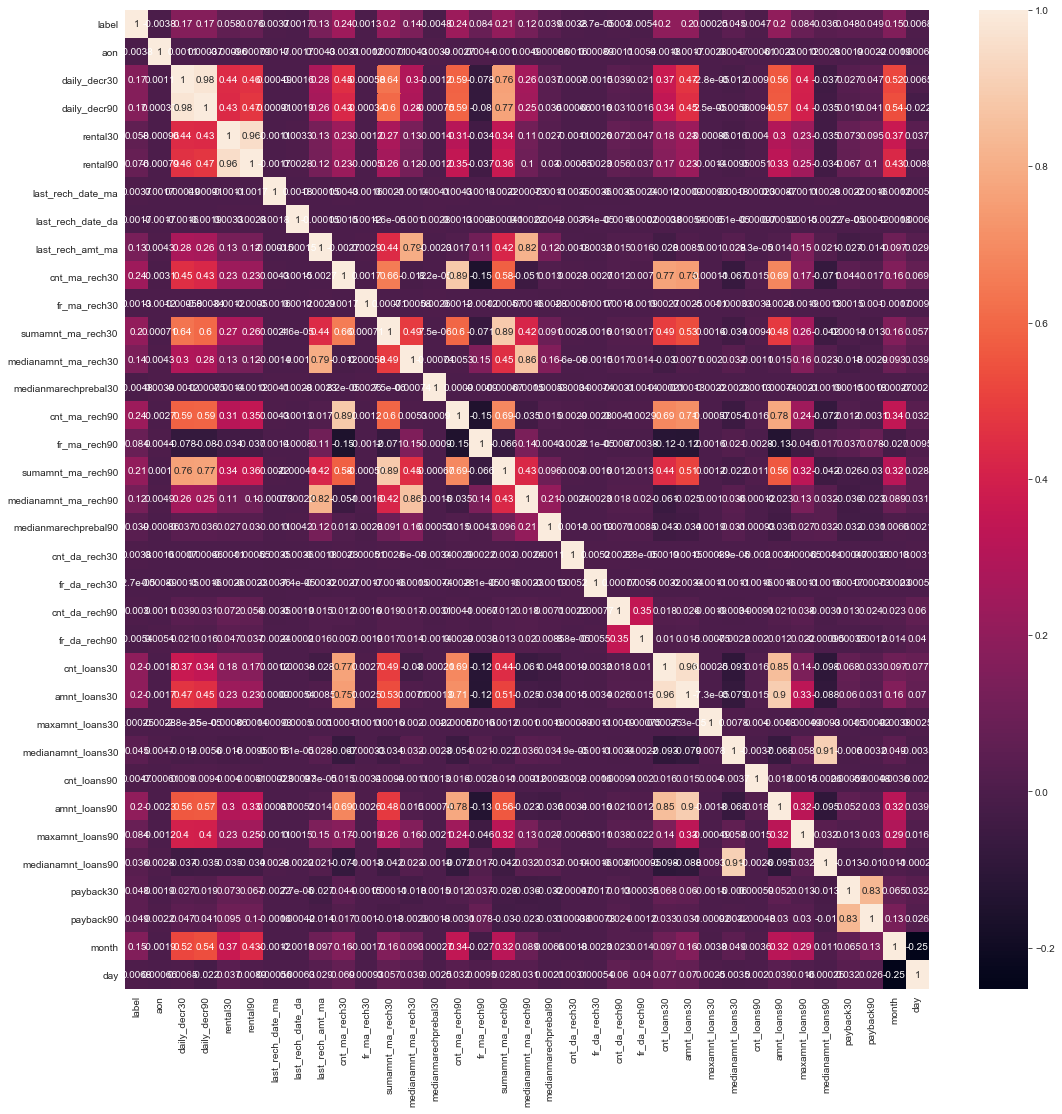

In [48]:
# This heatmap shows the Correlation between the columns

plt.figure(figsize=(18,18))
sb.heatmap(datafin.corr(),annot=True)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [49]:
x=datafin.drop(['label'],axis=1)
y=datafin['label']

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

In [51]:
model=[LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]

# Finding metric data , cross validation and prediction


Using for loop to find n number of model buidling at once

In this we are finding Accuracy score Confusion Matrix Classification Matrix

Also finding mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [52]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print ('Accuracy score:')
    print (accuracy_score(y_test,pred.round())*100)
    print ('Confusion Matrix:')
    print (confusion_matrix(y_test,pred.round()))
    print ('Classification Matrix:')
    print (classification_report(y_test,pred.round()))
    print('-'*100)
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square and r2 score')
    print()
    print('MAE      :',metrics.mean_absolute_error(y_test,pred))
    print('MSE      :',metrics.mean_squared_error(y_test,pred))
    print('RMSE     :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print('-'*100)
    print('cross validation and cross prediction')
    #cross valiadtion
    print()
    score=cross_val_score(m,x,y,cv=5)
    print('mean score :',score.mean())
    print('STD score  :',score.std())
    print()
    #cross prediction
    predscore=cross_val_predict(m,x,y,cv=5)
    print("cross prediction",predscore)
    print()
    print('*'*100)

Accuracy score: 87.52266264623371
Confusion Matrix: [[    1  6487     0     0]
 [    5 45860    45     1]
 [    0     0     0     0]
 [    0     0     0     0]]
Classification Matrix:               precision    recall  f1-score   support

         0.0       0.17      0.00      0.00      6488
         1.0       0.88      1.00      0.93     45911
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.88     52399
   macro avg       0.26      0.25      0.23     52399
weighted avg       0.79      0.88      0.82     52399

----------------------------------------------------------------------------------------------------
Finding mean_absolute_error,mean_squared_error, root_mean_square and r2 score

MAE : 0.2093180404559892
MSE : 0.09678417363405205
RMSE : 0.31110154874904117
r2 score : 0.10788107903019784
--------------------------------------------------------------------------------------------

# GridSearchCV

GridSearchCV for RandomForestRegressor

In [55]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap"         : [True],
            }
rfr=RandomForestRegressor()
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score  :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

# Saving the model with joblib

In [56]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'micro.pkl')

['micro.pkl']